In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('2023-01-19_Katarina_pulsed_05-1s_formation_C3D5_Cell106_Channel_52_Wb_1.csv')
data.head()

Data_Point                Date_Time  Test_Time(s)  Step_Time(s)  \
0           1  01/19/2023 15:11:06.814         0.250         0.251   
1           2  01/19/2023 15:11:07.064         0.501         0.501   
2           3  01/19/2023 15:11:07.064         0.501         0.501   
3           4  01/19/2023 15:11:07.448         0.885         0.251   
4           5  01/19/2023 15:11:07.698         1.134         0.500   

   Cycle_Index  Step_Index  Current(A)  Voltage(V)  Power(W)  \
0            1           1     0.00013     1.03530   0.00014   
1            1           1     0.00013     1.25080   0.00016   
2            1           1     0.00013     1.25080   0.00016   
3            1           2     0.00000     0.74485   0.00000   
4            1           2     0.00000     0.65179   0.00000   

   Charge_Capacity(Ah)  Discharge_Capacity(Ah)  Charge_Energy(Wh)  \
0                  0.0                     0.0                0.0   
1                  0.0                     0.0                0.0   
2                  0.0                     0.0                0.0   
3                  0.0                     0.0                0.0   
4                  0.0                     0.0                0.0   

   Discharge_Energy(Wh)  ACR(Ohm)  dV/dt(V/s)  Internal_Resistance(Ohm)  \
0                   0.0       NaN     1.72390                       NaN   
1                   0.0       NaN     0.72417                       NaN   
2                   0.0       NaN     0.72417                       NaN   
3                   0.0       NaN    -0.79597                       NaN   
4                   0.0       NaN         NaN                       NaN   

    dQ/dV(Ah/V)  dV/dQ(V/Ah)  
0  3.312600e-08   30188000.0  
1  4.097700e-08   24404000.0  
2  4.097700e-08   24404000.0  
3           NaN          NaN  
4           NaN          NaN

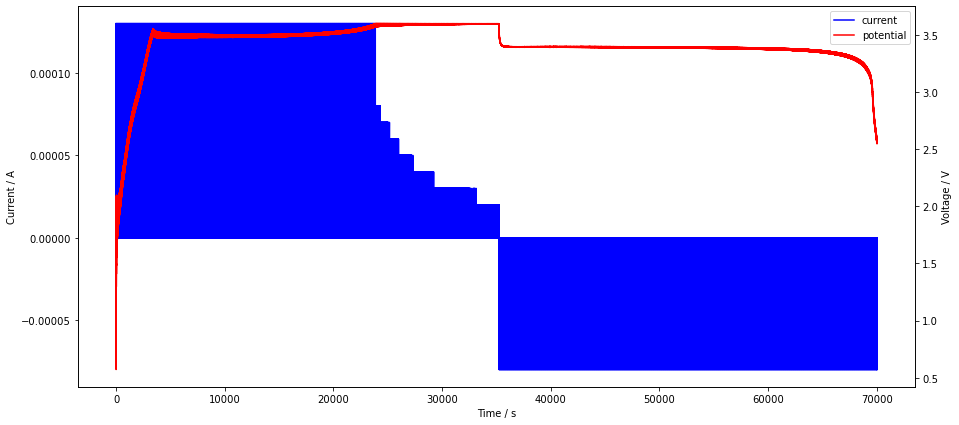

In [3]:
plt.rcParams['figure.figsize'] = [15, 7]

fig, ax1 = plt.subplots()

ax1.plot(data['Test_Time(s)'], data['Current(A)'], '-b', label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2.plot(data['Test_Time(s)'], data['Voltage(V)'], '-r', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()

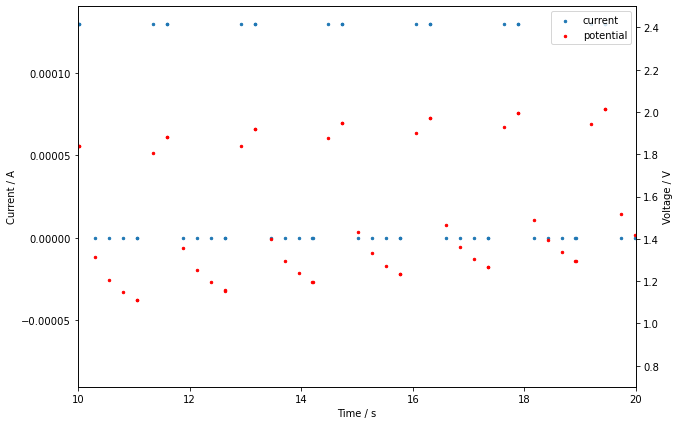

In [4]:
plt.rcParams['figure.figsize'] = [10, 7]

fig, ax1 = plt.subplots()

ax1.scatter(data['Test_Time(s)'], data['Current(A)'], s=6, label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2.scatter(data['Test_Time(s)'], data['Voltage(V)'], s=6, c='red', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.xlim(10,20)
plt.ylim(0.7,2.5)

plt.show()

(0.9, 2.6)

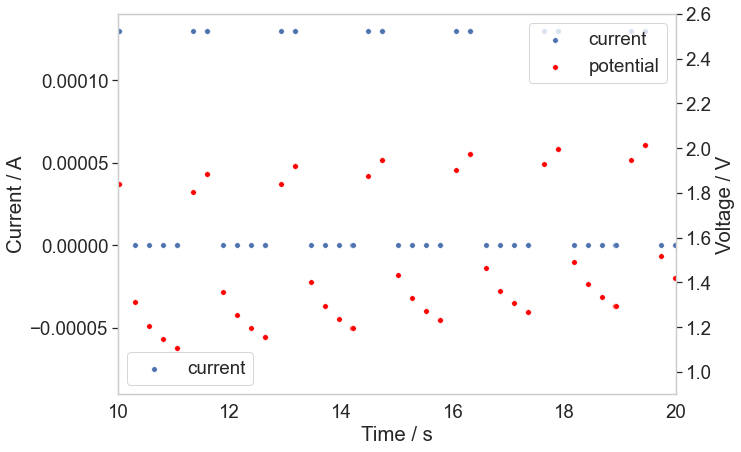

In [5]:
import seaborn as sns

sns.set(rc={"figure.figsize":(10, 7)})
sns.set(font_scale = 1.7)
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax1 = plt.subplots()

ax1=sns.scatterplot(data=data, x=data['Test_Time(s)'], y=data['Current(A)'], s=30, label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2=sns.scatterplot(data=data, x=data['Test_Time(s)'], y=data['Voltage(V)'], s=30, color='red', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)


ax.set_xlim(10, 20)
ax.set_ylim(0.9, 2.6)



In [6]:
# Charge voltage drop

step = list(data['Step_Index'])
current = list(data['Current(A)'])
voltage = list(data['Voltage(V)'])

CC_charge_current_on = []
CC_charge_current_off = []
CC_charge_potential_on = []
CC_charge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==1 or step[i]==2:
        if current[i]!=current[i-1] and step[i]==1 and i>0:
            CC_charge_current_off.append(tempcurr)
            CC_charge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==2 and i>0:
            CC_charge_current_on.append(tempcurr)
            CC_charge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_charge_current_on))
print(len(CC_charge_current_off))
print(len(CC_charge_potential_on))
print(len(CC_charge_potential_off))
print('\n')
print(CC_charge_current_on[0:2])
print(CC_charge_current_off[0:2])
print('\n')
print(CC_charge_potential_on[0:2])
print(CC_charge_potential_off[0:2])


15160
15160
15160
15160


[[0.00013, 0.00013, 0.00013], [0.00013, 0.00013, 0.00013]]
[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]


[[1.0353, 1.2508, 1.2508], [1.326, 1.4552, 1.4552]]
[[0.74485, 0.65179, 0.60284, 0.57112, 0.57112], [0.91046, 0.81096, 0.75605, 0.71925, 0.71925]]


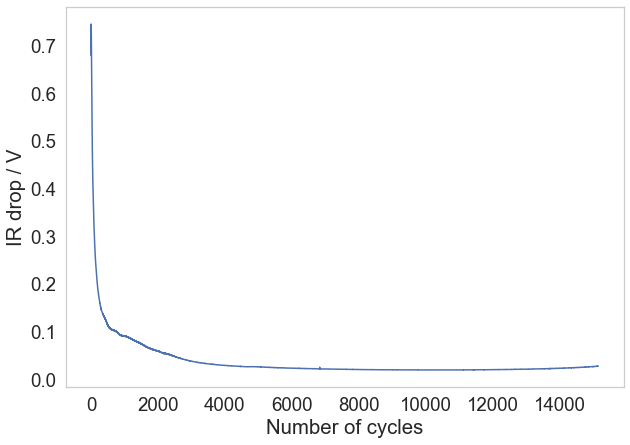

In [7]:
# pseudo IR drop

IRdrop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][-1]
    IRdrop.append(x)

plt.plot(IRdrop)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [8]:
# Charging pseudo-IR drop

print(f'Number of cycles: {len(IRdrop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IRdrop[0]}')
print(f'IR drop at 2% state of charge: {IRdrop[round(len(IRdrop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IRdrop[round(len(IRdrop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IRdrop[round(len(IRdrop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IRdrop[round(len(IRdrop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IRdrop[round(len(IRdrop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IRdrop[round(len(IRdrop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IRdrop[round(len(IRdrop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IRdrop[round(len(IRdrop)*0.95)]}')



Number of cycles: 15160


IR drop at 0% state of charge: 0.67968
IR drop at 2% state of charge: 0.1473
IR drop at 5% state of charge: 0.10029999999999983
IR drop at 10% state of charge: 0.07390000000000008
IR drop at 20% state of charge: 0.03770000000000007
IR drop at 50% state of charge: 0.021199999999999886
IR drop at 70% state of charge: 0.01990000000000025
IR drop at 90% state of charge: 0.022699999999999942
IR drop at 95% state of charge: 0.024499999999999744


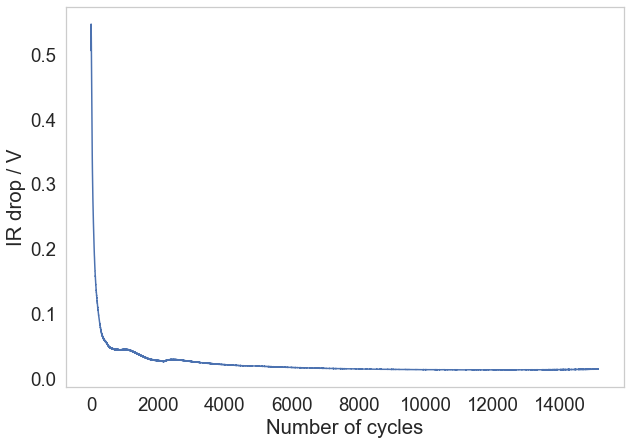

In [17]:
# IR drop

IR_drop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][0]
    IR_drop.append(x)

plt.plot(IR_drop)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [18]:
# Charging IR drop

print(f'Number of cycles: {len(IR_drop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IR_drop[0]}')
print(f'IR drop at 2% state of charge: {IR_drop[round(len(IRdrop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IR_drop[round(len(IRdrop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IR_drop[round(len(IRdrop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IR_drop[round(len(IRdrop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IR_drop[round(len(IRdrop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IR_drop[round(len(IRdrop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IR_drop[round(len(IRdrop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IR_drop[round(len(IRdrop)*0.95)]}')

Number of cycles: 15160


IR drop at 0% state of charge: 0.5059499999999999
IR drop at 2% state of charge: 0.07210000000000027
IR drop at 5% state of charge: 0.04420000000000002
IR drop at 10% state of charge: 0.03410000000000002
IR drop at 20% state of charge: 0.025599999999999845
IR drop at 50% state of charge: 0.014399999999999746
IR drop at 70% state of charge: 0.0129999999999999
IR drop at 90% state of charge: 0.013099999999999667
IR drop at 95% state of charge: 0.01330000000000009


In [9]:
# Discharge voltage drop

CC_discharge_current_on = []
CC_discharge_current_off = []
CC_discharge_potential_on = []
CC_discharge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==7 or step[i]==8:
        if current[i]!=current[i-1] and step[i]==7 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_off.append(tempcurr)
            CC_discharge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==8 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_on.append(tempcurr)
            CC_discharge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_discharge_current_on))
print(len(CC_discharge_current_off))
print(len(CC_discharge_potential_on))
print(len(CC_discharge_potential_off))
print('\n')
print(CC_discharge_current_on[0:2])
print(CC_discharge_current_off[0:2])
print('\n')
print(CC_discharge_potential_on[0:2])
print(CC_discharge_potential_off[0:2])

22152
22152
22152
22152


[[-8e-05, -8e-05, -8e-05], [-8e-05, -8e-05, -8e-05]]
[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]


[[3.5815, 3.5718, 3.5718], [3.5661, 3.5581, 3.5581]]
[[3.5765, 3.5781, 3.579, 3.5794, 3.5794], [3.5648, 3.5669, 3.568, 3.5688, 3.5688]]


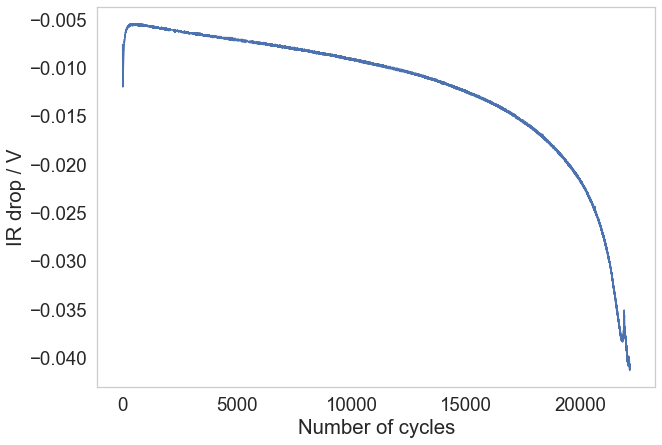

In [10]:
# pseudo IR drop discharge

IRdrop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][-1]
    IRdrop_dis.append(x)

plt.plot(IRdrop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [11]:
# pseudo IR drop discharge

print(f'Number of cycles: {len(IRdrop_dis)}')
print('\n')
print(f'IR drop at 5% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.05)]}')
print(f'IR drop at 10% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.1)]}')
print(f'IR drop at 20% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.2)]}')
print(f'IR drop at 50% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.5)]}')
print(f'IR drop at 70% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.7)]}')
print(f'IR drop at 90% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.9)]}')
print(f'IR drop at 95% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.95)]}')
print(f'IR drop at 98% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.98)]}')

Number of cycles: 22152


IR drop at 5% state of discharge: -0.005700000000000038
IR drop at 10% state of discharge: -0.006099999999999994
IR drop at 20% state of discharge: -0.00690000000000035
IR drop at 50% state of discharge: -0.009700000000000042
IR drop at 70% state of discharge: -0.0129999999999999
IR drop at 90% state of discharge: -0.021500000000000075
IR drop at 95% state of discharge: -0.027799999999999603
IR drop at 98% state of discharge: -0.03730000000000011


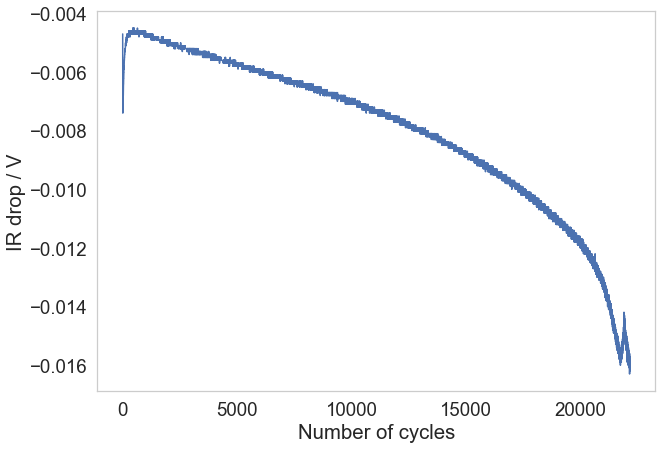

In [19]:
# IR drop discharge

IR_drop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][0]
    IR_drop_dis.append(x)

plt.plot(IR_drop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [20]:
# IR drop discharge

print(f'Number of cycles: {len(IR_drop_dis)}')
print('\n')
print(f'IR drop at 5% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.05)]}')
print(f'IR drop at 10% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.1)]}')
print(f'IR drop at 20% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.2)]}')
print(f'IR drop at 50% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.5)]}')
print(f'IR drop at 70% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.7)]}')
print(f'IR drop at 90% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.9)]}')
print(f'IR drop at 95% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.95)]}')
print(f'IR drop at 98% state of discharge: {IR_drop_dis[round(len(IRdrop_dis)*0.98)]}')

Number of cycles: 22152


IR drop at 5% state of discharge: -0.0047000000000001485
IR drop at 10% state of discharge: -0.00509999999999966
IR drop at 20% state of discharge: -0.005600000000000271
IR drop at 50% state of discharge: -0.007299999999999862
IR drop at 70% state of discharge: -0.009100000000000108
IR drop at 90% state of discharge: -0.011699999999999822
IR drop at 95% state of discharge: -0.013199999999999878
IR drop at 98% state of discharge: -0.015800000000000036


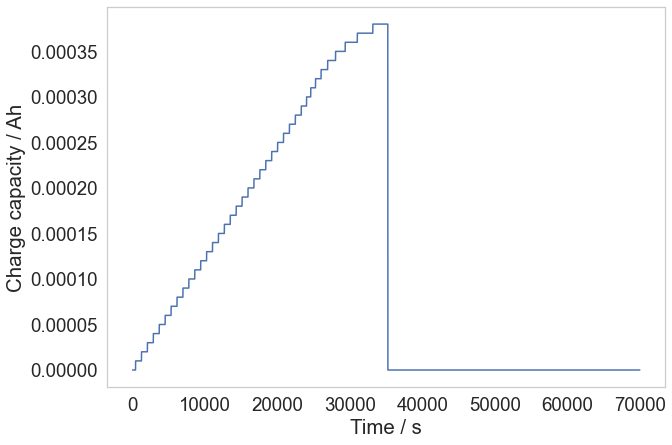

In [12]:
plt.plot(data['Test_Time(s)'], data['Charge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Charge capacity / Ah')

plt.show()

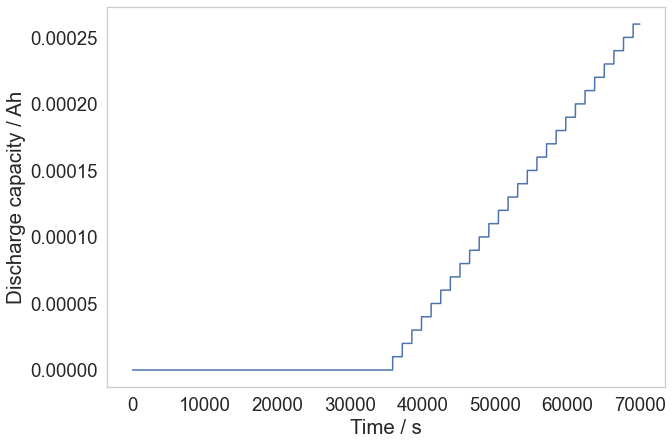

In [13]:
plt.plot(data['Test_Time(s)'], data['Discharge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Discharge capacity / Ah')

plt.show()

In [14]:
max_charge = data['Charge_Capacity(Ah)'].max()
print(f'Charge capacity: {max_charge} Ah.')
print(f'Charge capacity: {float(max_charge)*1000} mAh.')

Charge capacity: 0.00038 Ah.
Charge capacity: 0.38 mAh.


In [15]:
max_charge = data['Discharge_Capacity(Ah)'].max()
print(f'Discharge capacity: {max_charge} Ah.')
print(f'Discharge capacity: {float(max_charge)*1000} mAh.')

Discharge capacity: 0.00026 Ah.
Discharge capacity: 0.25999999999999995 mAh.


In [16]:
step = data['Step_Index']
time = data['Test_Time(s)']
current = data['Current(A)']

charge_time = []
charge_current = []
discharge_time = []
discharge_current = []
for i in range(len(current)):
    if step[i]==1 or step[i]==2 or step[i]==3 or step[i]==4:
        charge_time.append(time[i])
        charge_current.append(current[i])
    elif step[i]==7 or step[i]==8:
        discharge_time.append(time[i])
        discharge_current.append(current[i])

C=np.trapz(x=charge_time, y=charge_current)
C=C*1000/3600
print(f'Charge capacity: {round(C,2)} mAh.')

D=np.trapz(x=discharge_time, y=discharge_current)
D=D*1000/3600
print(f'Discharge capacity: {round(D,2)} mAh.')

Charge capacity: 0.33 mAh.
Discharge capacity: -0.26 mAh.
